In [56]:
import pandas as pd
df=pd.read_csv('nnv_org.csv')
df.head()

,id,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,...,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,0.0
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",True,358,4521.5,0.0
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171,1653.78,0.0
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855,16007.06,0.0
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",True,7590,45450.08,0.0


In [57]:
check_cols=['unit price',
    'line item quantity',
    'line item value',
    'weight (kilograms)',
    'freight cost (usd)',
    'line item insurance (usd)']
x_train=df[check_cols]
x_train.head()

,unit price,line item quantity,line item value,weight (kilograms),freight cost (usd),line item insurance (usd)
0,0.97,19,551.0,13,780.34,0.0
1,0.03,1000,6200.0,358,4521.5,0.0
2,0.80,500,40000.0,171,1653.78,0.0
3,0.07,31920,127360.8,1855,16007.06,0.0
4,0.05,38000,121600.0,7590,45450.08,0.0


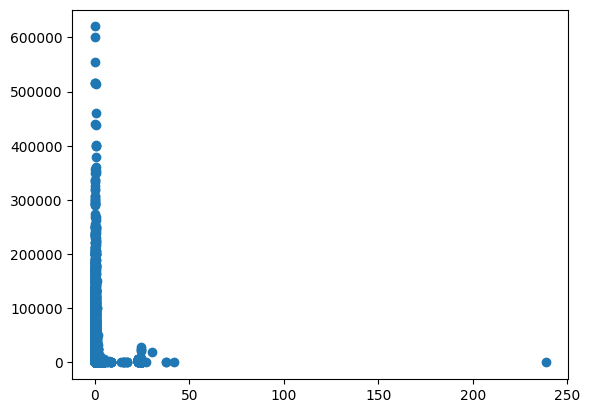

In [58]:
import matplotlib.pyplot as plt
plt.scatter(x_train.iloc[:,0],x_train.iloc[:,1])

In [59]:
from sklearn.ensemble import IsolationForest
x_train=x_train.apply(pd.to_numeric,errors='coerce')
x_train=x_train.dropna()
clf=IsolationForest(contamination=0.2)
clf.fit(x_train)
predictions=clf.predict(x_train)
predictions

array([ 1,  1,  1, ...,  1, -1,  1])

In [60]:
import numpy as np
abn_ind=np.where(predictions<0)
abn_ind
predictions

array([ 1,  1,  1, ...,  1, -1,  1])

In [61]:
import numpy as np
index=np.where(predictions<0)
index

(array([   4,    8,   23, ..., 6168, 6170, 6173], dtype=int64),)

In [62]:
x=x_train.values

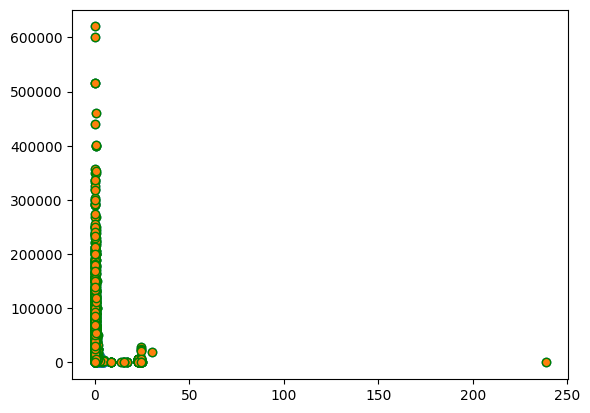

In [63]:
index=np.where(predictions<0)
plt.scatter(x_train.iloc[:,0],x_train.iloc[:,1])
plt.scatter(x[index,0],x[index,1],edgecolors="g")

In [64]:
cols=['line item quantity',
    'line item value']
n_train=df[cols]
n_train.head()

,line item quantity,line item value
0,19,551.0
1,1000,6200.0
2,500,40000.0
3,31920,127360.8
4,38000,121600.0


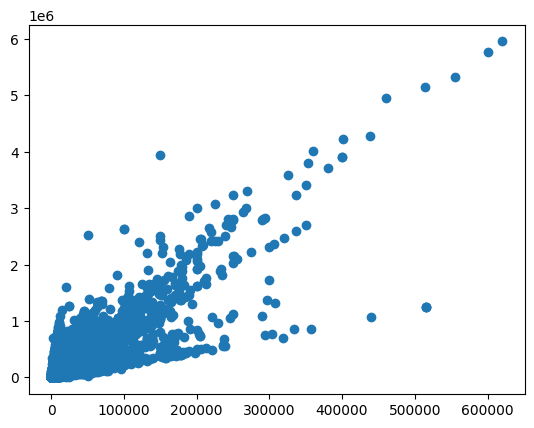

In [65]:
import matplotlib.pyplot as plt
plt.scatter(n_train.iloc[:,0],n_train.iloc[:,1])

In [66]:
from sklearn.ensemble import IsolationForest
n_train=n_train.apply(pd.to_numeric,errors='coerce')
n_train=n_train.dropna()
f=IsolationForest(contamination=0.2)
f.fit(n_train)
pred=f.predict(n_train)
pred

array([ 1,  1,  1, ..., -1,  1, -1])

In [67]:
import numpy as np
ind=np.where(pred<0)
ind
pred

array([ 1,  1,  1, ..., -1,  1, -1])

In [68]:
import numpy as np
ind=np.where(pred<0)
ind

(array([    4,    30,    52, ..., 10319, 10321, 10323], dtype=int64),)

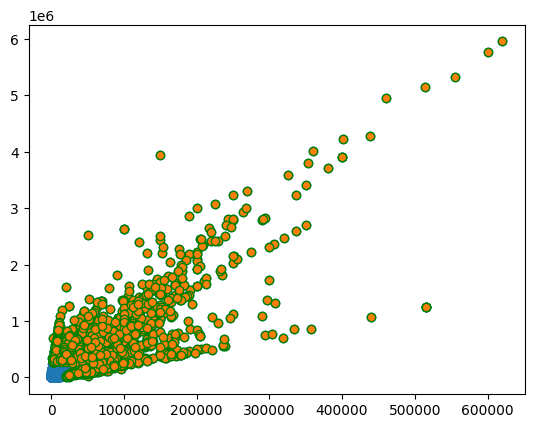

In [69]:
n=n_train.values
index=np.where(pred<0)
plt.scatter(n_train.iloc[:,0],n_train.iloc[:,1])
plt.scatter(n[ind,0],n[ind,1],edgecolors="g")